## Importing libraries

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [323]:
df = pd.read_csv('data/car_price_dataset.csv')

In [324]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [325]:
# Check the shape of your data
df.shape

(8128, 13)

In [326]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [327]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [328]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [329]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [330]:
# rename columns
df.rename(columns = {'name':'brand', 
                     }, inplace = True)

In [331]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

#### Distribution plot

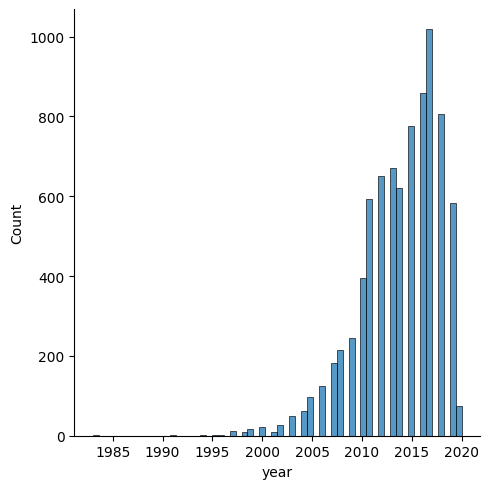

In [332]:
sns.displot(data = df, x = 'year')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Text(0.5, 0, 'year')

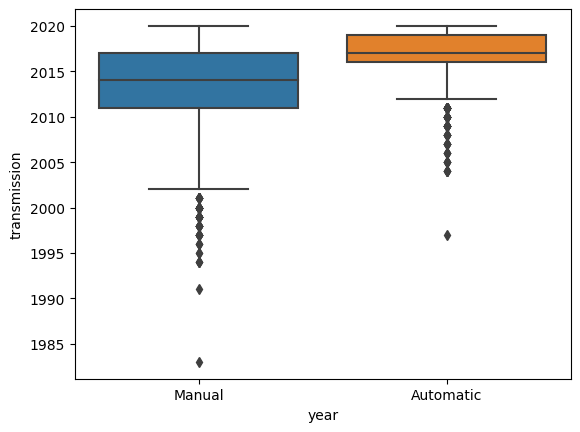

In [333]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["transmission"], y = df["year"])
plt.ylabel("transmission")
plt.xlabel("year")

#### Scatterplot

<Axes: xlabel='selling_price', ylabel='year'>

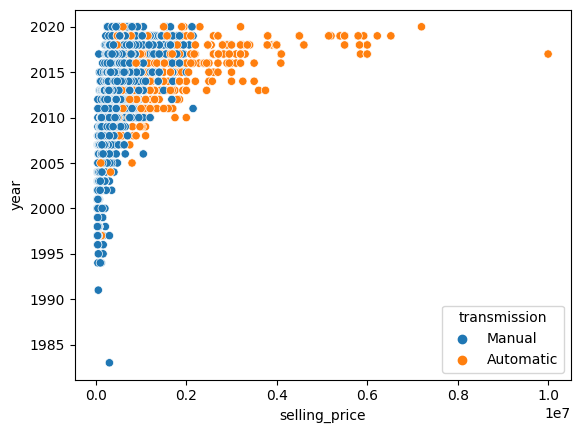

In [334]:
sns.scatterplot(x = df['selling_price'], y = df['year'], hue=df['transmission'])

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

<Axes: >

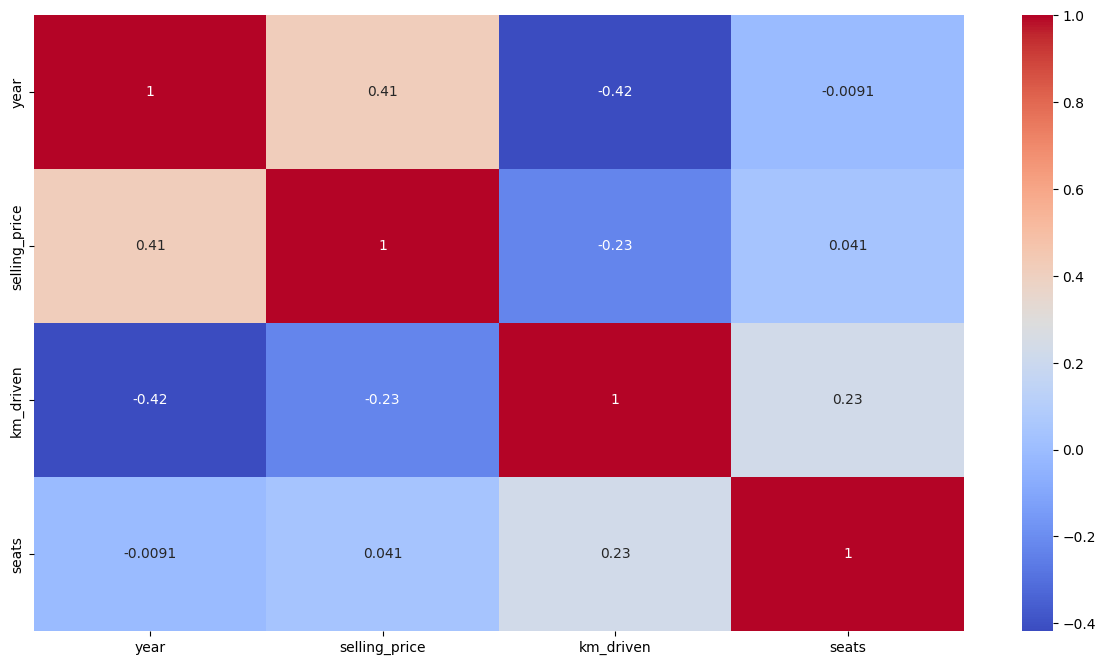

In [335]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [336]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["owner"] = le.fit_transform(df["owner"])

df["owner"].unique()

array([0, 2, 4, 1, 3])

In [337]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [338]:
# Define the mapping for label encoding
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above': 4,
    'Test Drive': 5
}

# Apply label encoding using the defined mapping
df['owner'] = df['owner'].replace(owner_mapping)

In [339]:
# Remove rows with 'CNG' and 'LPG' in the 'fuel' column
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [340]:
# Extract numeric mileage values by splitting and converting to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [341]:
# Remove "CC" and convert to float
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

In [342]:
# Remove " bhp" and convert to float, handling N/A values
df['max_power'] = df['max_power'].str.replace(' bhp', '')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce') #It should be float.

In [343]:
# Extract the first word and update the column
df['brand'] = df['brand'].apply(lambda x: x.split()[0])

In [344]:
# Drop the 'torque' feature
df = df.drop(columns=['torque'])

In [345]:
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,0,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,0,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,0,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


<Axes: >

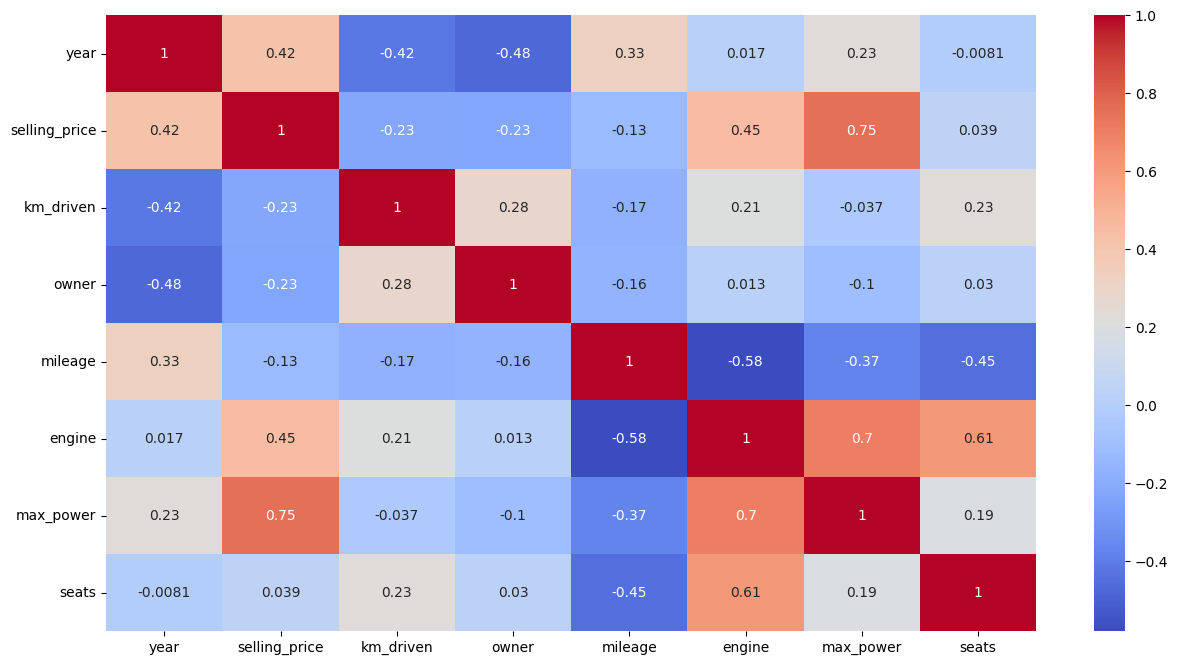

In [346]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

<Axes: xlabel='x', ylabel='y'>

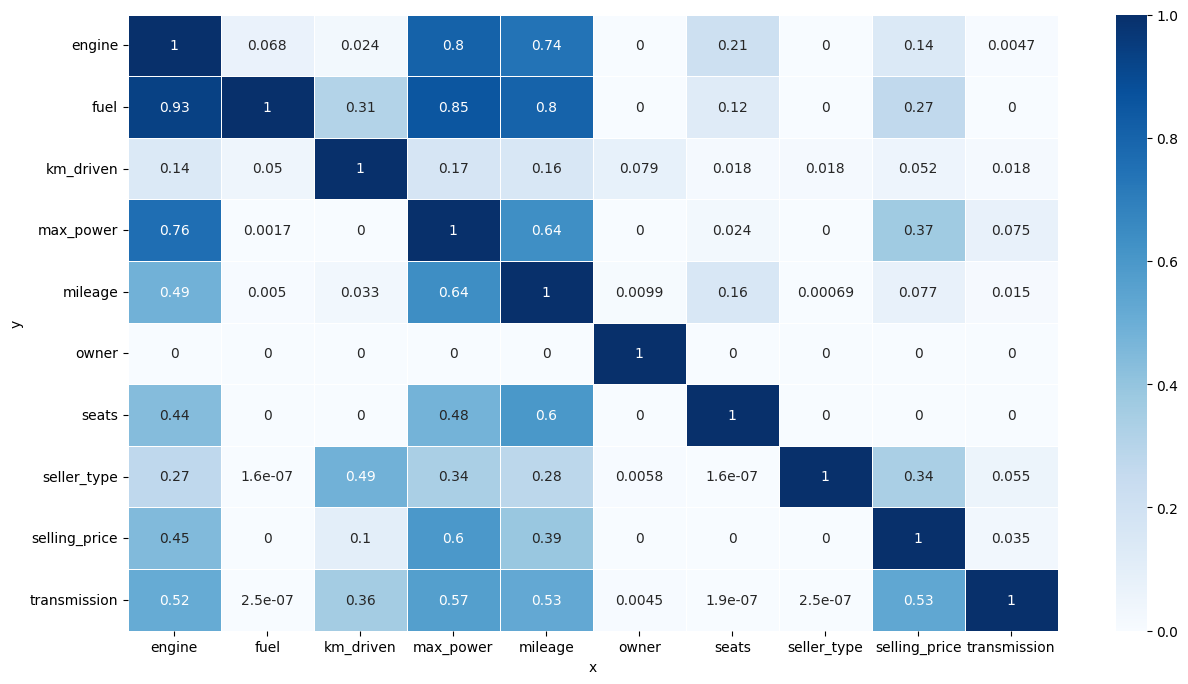

In [347]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['brand', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)